# Problem definition:
## To find out whether there is any gender discrimination in graduates' wages.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Data Preparation and Cleaning:

## Graduates' Data (Predictor):

In [2]:
# Obtaining the data for graduates
graduates_df = pd.read_csv("graduates.csv")
graduates_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Theme: Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Subject: Education, Language Spoken and Literacy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Graduates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table Title: Graduates From University First D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Values are shown in Singapore dollars (unless ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Generated by: SingStat Table Builder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Date generated: 16/03/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Cleaning data
graduates_df = pd.DataFrame(graduates_df.iloc[9:42])

# Swapping x and y axes
graduates_df = graduates_df.transpose()

# Dropping a redundant column "Unnamed"
graduates_df = graduates_df.reset_index(drop=True)

# Renaming the columns for better readability and dropping duplicate names
graduates_df = graduates_df.set_axis(graduates_df.iloc[0], axis='columns')
graduates_df = graduates_df.rename(columns={"Data Series": "Year"})
graduates_df = graduates_df.drop(index=0)

In [4]:
graduates_df

,Year,Males,Males: Education,Males: Applied Arts,Males: Humanities & Social Sciences,Males: Mass Communication & Information Science,Males: Accountancy,Males: Business & Administration,Males: Law,Males: Natural & Mathematical Sciences,...,Females: Business & Administration,Females: Law,Females: Natural & Mathematical Sciences,Females: Medicine,Females: Dentistry,Females: Health Sciences,Females: Information Technology,"Females: Architecture, Building & Real Estate",Females: Engineering Sciences,Females: Services
1,2021.0,10075.0,46.0,180.0,1192.0,92.0,638.0,1284.0,199.0,761.0,...,1649.0,216.0,884.0,196.0,33.0,590.0,464.0,313.0,1359.0,142.0
2,2020.0,9880.0,58.0,163.0,1180.0,82.0,625.0,1121.0,190.0,816.0,...,1472.0,204.0,1133.0,178.0,35.0,547.0,440.0,318.0,1405.0,125.0
3,2019.0,9429.0,54.0,186.0,1119.0,74.0,611.0,1076.0,217.0,812.0,...,1437.0,155.0,1212.0,181.0,33.0,430.0,408.0,369.0,1363.0,91.0
4,2018.0,9404.0,73.0,189.0,1095.0,68.0,596.0,1082.0,238.0,849.0,...,1291.0,165.0,1285.0,189.0,39.0,385.0,393.0,398.0,1346.0,108.0
5,2017.0,8963.0,65.0,175.0,1078.0,78.0,574.0,973.0,187.0,743.0,...,1242.0,188.0,1337.0,156.0,33.0,410.0,367.0,303.0,1478.0,124.0
6,2016.0,7703.0,79.0,173.0,803.0,35.0,439.0,751.0,178.0,755.0,...,969.0,173.0,1195.0,147.0,28.0,368.0,381.0,274.0,1385.0,95.0
7,2015.0,7872.0,99.0,187.0,743.0,42.0,480.0,771.0,187.0,790.0,...,848.0,168.0,1145.0,115.0,32.0,353.0,377.0,351.0,1375.0,188.0
8,2014.0,7756.0,124.0,165.0,803.0,44.0,473.0,631.0,180.0,786.0,...,846.0,176.0,1103.0,127.0,30.0,309.0,289.0,258.0,1251.0,219.0
9,2013.0,7724.0,167.0,138.0,818.0,62.0,399.0,693.0,189.0,870.0,...,897.0,179.0,1257.0,124.0,27.0,296.0,251.0,258.0,1323.0,345.0
10,2012.0,6778.0,116.0,108.0,737.0,37.0,447.0,572.0,140.0,837.0,...,825.0,207.0,1074.0,123.0,21.0,218.0,280.0,241.0,1213.0,135.0


In [5]:
# Filling the missing data with 0
graduates_df = graduates_df.replace('na', 0)

# Changing dtypes to int
graduates_df = graduates_df.astype(int)
graduates_df.sort_values(by='Year')

,Year,Males,Males: Education,Males: Applied Arts,Males: Humanities & Social Sciences,Males: Mass Communication & Information Science,Males: Accountancy,Males: Business & Administration,Males: Law,Males: Natural & Mathematical Sciences,...,Females: Business & Administration,Females: Law,Females: Natural & Mathematical Sciences,Females: Medicine,Females: Dentistry,Females: Health Sciences,Females: Information Technology,"Females: Architecture, Building & Real Estate",Females: Engineering Sciences,Females: Services
29,1993,3565,0,0,481,0,295,282,92,404,...,708,93,588,61,11,40,215,144,254,0
28,1994,3889,0,0,512,0,271,413,87,374,...,733,99,566,66,6,39,196,182,227,0
27,1995,4003,12,0,497,0,289,365,94,460,...,788,100,572,48,8,46,193,156,276,0
26,1996,4022,46,0,497,0,262,358,75,449,...,848,106,541,53,13,59,194,136,250,0
25,1997,4276,45,0,554,28,227,448,90,437,...,808,97,600,40,10,60,218,163,333,0
24,1998,4455,56,0,547,27,264,461,70,422,...,869,103,678,42,12,69,296,153,413,0
23,1999,4573,44,0,576,19,297,349,92,401,...,905,77,674,41,14,77,218,167,492,0
22,2000,4536,35,0,574,34,250,328,74,378,...,851,79,655,37,15,30,187,192,682,0
21,2001,4735,63,0,534,39,257,403,58,358,...,807,96,754,42,16,46,133,199,803,0
20,2002,4858,63,0,591,30,226,318,73,276,...,751,77,699,60,11,49,199,224,880,0


In [6]:
# Making a new DF with only male and female graduates number, and also make a new column called total
mftotal_df = pd.DataFrame(graduates_df[["Year", "Males", "Females"]])

In [7]:
mftotal_df["Total"] = mftotal_df["Males"]+mftotal_df["Females"]

In [8]:
mftotal_df

,Year,Males,Females,Total
1,2021,10075,9686,19761
2,2020,9880,9938,19818
3,2019,9429,9744,19173
4,2018,9404,9593,18997
5,2017,8963,9574,18537
6,2016,7703,8192,15895
7,2015,7872,7638,15510
8,2014,7756,7620,15376
9,2013,7724,8085,15809
10,2012,6778,7228,14006


In [9]:
mftotal_df.sort_values("Year")

,Year,Males,Females,Total
29,1993,3565,3683,7248
28,1994,3889,3625,7514
27,1995,4003,3923,7926
26,1996,4022,4196,8218
25,1997,4276,4403,8679
24,1998,4455,4876,9331
23,1999,4573,4890,9463
22,2000,4536,4870,9406
21,2001,4735,5124,9859
20,2002,4858,5354,10212


 ### Plot male, female and total graduates over time

In [10]:
males = mftotal_df["Males"]
females = mftotal_df["Females"]
total = mftotal_df["Total"]
year = mftotal_df["Year"]

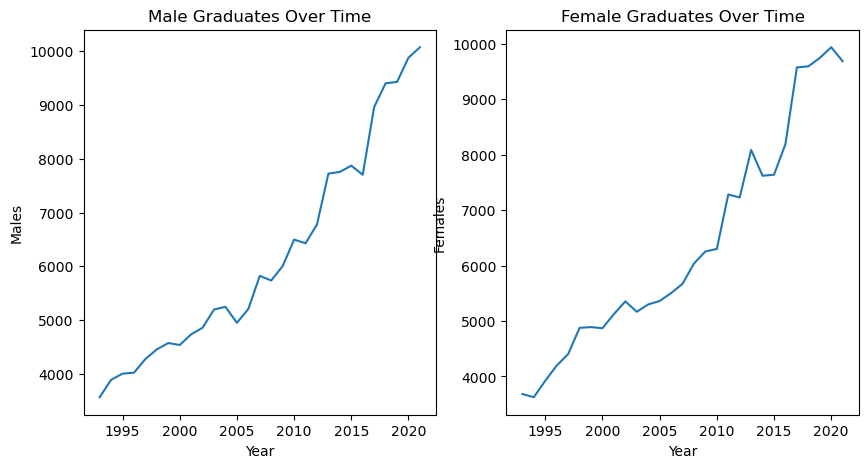

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))


# Plot the first scatterplot in the first subplot
sns.lineplot(y=males, x=year, ax=axs[0])
axs[0].set_title('Male Graduates Over Time')

# Plot the second scatterplot in the second subplot
sns.lineplot(y=females, x=year, ax=axs[1])
axs[1].set_title('Female Graduates Over Time')
plt.show()

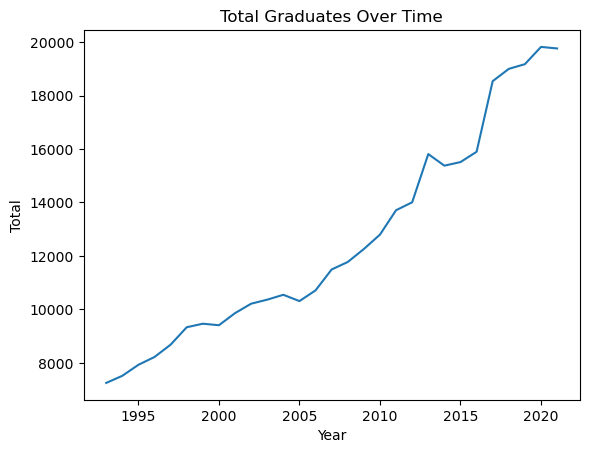

In [12]:
sns.lineplot(y=total, x=year)
plt.title("Total Graduates Over Time")
plt.show()

## Wages (Predictand):

In [13]:
# Obtaining the data for wages
wages_df = pd.read_csv("wages.csv")
wages_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Theme: Economy & Prices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Subject: Labour, Employment, Wages and Product...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Wages and Income from Work,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table Title: Gross Monthly Income From Work (I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data last updated: 01/12/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Source: MINISTRY OF MANPOWER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dollar
9,Data Series,2022,2021.0,2020.0,2019.0,2018.0,2017.0,2016.0,2015.0,2014.0,...,2007.0,2006.0,2004.0,2003.0,2002.0,2001.0,1999.0,1998.0,1997.0,1996


In [14]:
wages_df = pd.DataFrame(wages_df.iloc[9:11])

# Swapping x and y axes
wages_df = wages_df.transpose()

# Dropping a redundant column "Unnamed"
wages_df = wages_df.reset_index(drop=True)

# Renaming the columns for better readability
wages_df = wages_df.set_axis(['Year', 'Median Monthly Income'], axis='columns')

# Dropping the duplicate column names
wages_df = wages_df.drop(index=0)

# Standardising all data values into integers
wages_df = wages_df.astype(int)
wages_df = wages_df.sort_values(by='Year')

In [15]:
wages_df

,Year,Median Monthly Income
25,1996,1950
24,1997,2078
23,1998,2240
22,1999,2026
21,2001,2387
20,2002,2380
19,2003,2410
18,2004,2326
17,2006,2449
16,2007,2543


Text(0.5, 1.0, 'Wages Over Time')

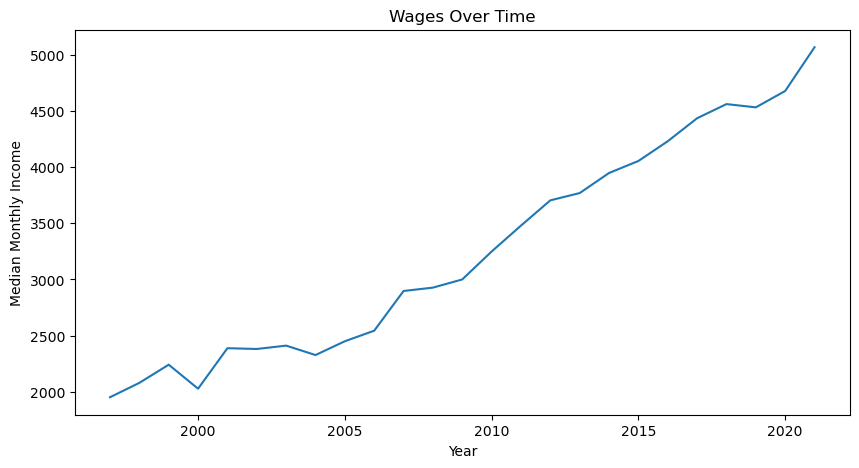

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))


# Plot the first scatterplot in the first subplot
sns.lineplot(y=wages_df["Median Monthly Income"], x=year)
axs.set_title('Wages Over Time')

### Here we use linear regression model for total number of graduates, male graduates and female graduates

In [17]:
# Create new dataframe for easier access
data = pd.merge(wages_df, mftotal_df, on='Year')

In [18]:
data

,Year,Median Monthly Income,Males,Females,Total
0,1996,1950,4022,4196,8218
1,1997,2078,4276,4403,8679
2,1998,2240,4455,4876,9331
3,1999,2026,4573,4890,9463
4,2001,2387,4735,5124,9859
5,2002,2380,4858,5354,10212
6,2003,2410,5197,5166,10363
7,2004,2326,5246,5299,10545
8,2006,2449,5207,5503,10710
9,2007,2543,5823,5670,11493


<AxesSubplot:xlabel='Total', ylabel='Median Monthly Income'>

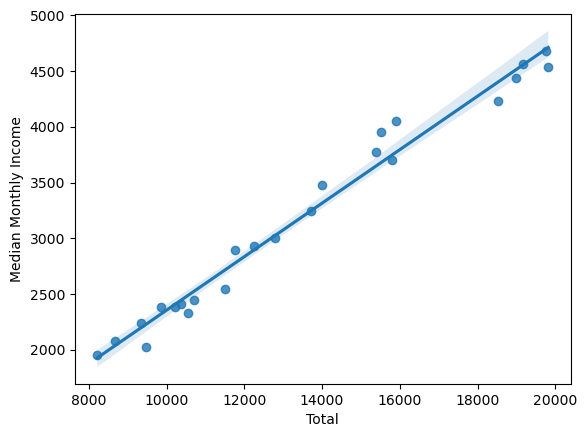

In [19]:
sns.regplot(data = data, x = "Total", y = "Median Monthly Income")

<AxesSubplot:>

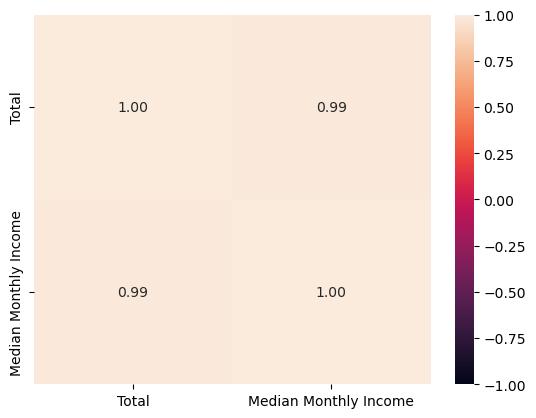

In [20]:
# Calculate the correlation between the two columns/variables
sns.heatmap(data[["Total", "Median Monthly Income"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### We see that the total number of graduates has a strong correlation with the median monthly income, now to do the same for male graduates and female graduates

<AxesSubplot:xlabel='Males', ylabel='Median Monthly Income'>

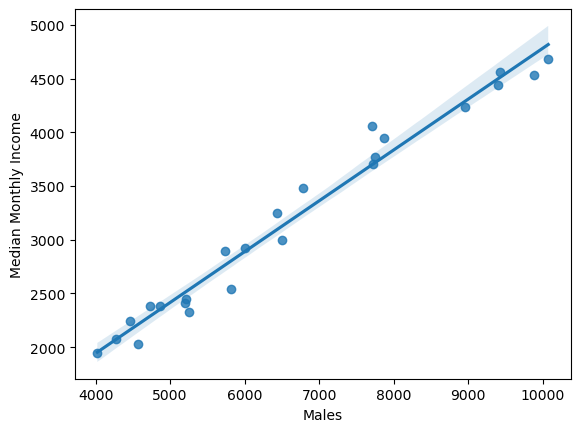

In [21]:
sns.regplot(data = data, x = "Males", y = "Median Monthly Income")

<AxesSubplot:>

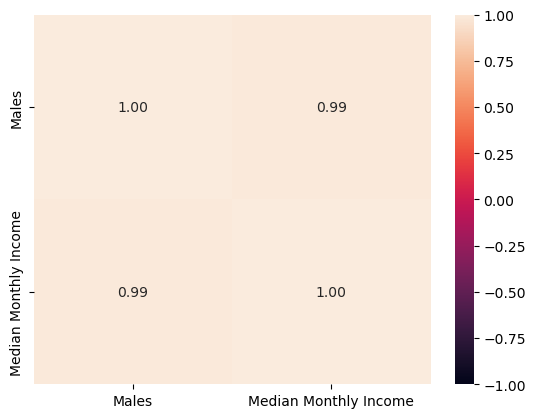

In [22]:
# Calculate the correlation between the two columns/variables
sns.heatmap(data[["Males", "Median Monthly Income"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:xlabel='Females', ylabel='Median Monthly Income'>

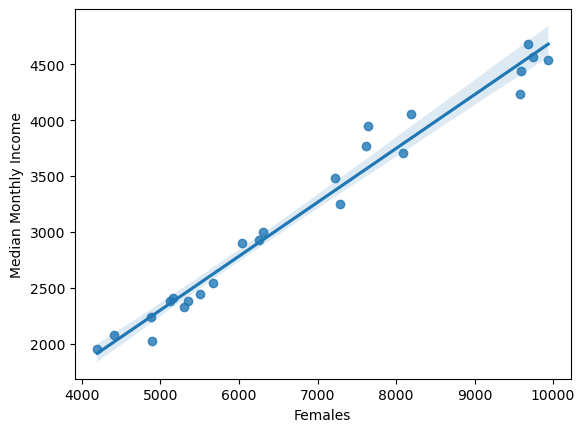

In [23]:
sns.regplot(data = data, x = "Females", y = "Median Monthly Income")

<AxesSubplot:>

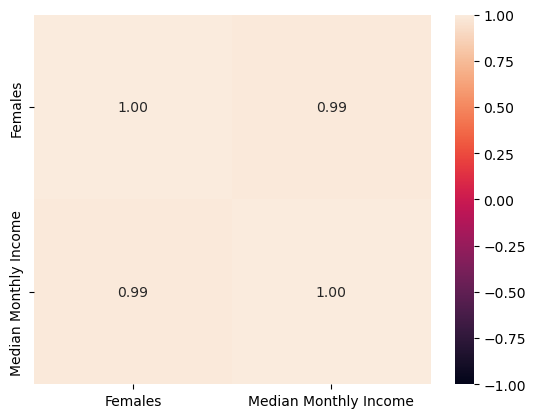

In [24]:
# Calculate the correlation between the two columns/variables
sns.heatmap(data[["Females", "Median Monthly Income"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Both number of male and female graduates have a strong correlation with median monthly income.

### However, our group propose that the number of graduates is not the real reason that median monthly income rises, but instead the productivity that comes about. Hence we will be using mediation analysis for this.

## Productivity (Mediator):

In [25]:
# Obtaining the data for productivity
productivity_df = pd.read_csv("productivity.csv")
productivity_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180
0,Theme: Economy & Prices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: Leading Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Composite Leading Index (CLI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table Title: Composite Leading Index (2015 = 1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data last updated: 13/02/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Source: SINGAPORE DEPARTMENT OF STATISTICS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Index
9,Data Series,2022 4Q,2022 3Q,2022 2Q,2022 1Q,2021 4Q,2021 3Q,2021 2Q,2021 1Q,2020 4Q,...,1980 2Q,1980 1Q,1979 4Q,1979 3Q,1979 2Q,1979 1Q,1978 4Q,1978 3Q,1978 2Q,1978 1Q


In [26]:
productivity_df = pd.DataFrame(productivity_df.iloc[9:11])

# Swapping x and y axes
productivity_df = productivity_df.transpose()

# Dropping a redundant column "Unnamed"
productivity_df = productivity_df.reset_index()

# Renaming the columns for better readability
productivity_df = productivity_df.set_axis(['Annual', 'Quarterly', 'Composite Leading Index'], axis='columns')

# Dropping the duplicate column names
productivity_df = productivity_df.drop(index=0)

In [27]:
productivity_df

,Annual,Quarterly,Composite Leading Index
1,Unnamed: 1,2022 4Q,106.2
2,Unnamed: 2,2022 3Q,110.5
3,Unnamed: 3,2022 2Q,111.9
4,Unnamed: 4,2022 1Q,111.6
5,Unnamed: 5,2021 4Q,112.3
...,...,...,...
176,Unnamed: 176,1979 1Q,28.8
177,Unnamed: 177,1978 4Q,27.6
178,Unnamed: 178,1978 3Q,28.3
179,Unnamed: 179,1978 2Q,27.5


In [28]:
# Inputting the years into the empty Annual Column
for n in range(1, len(productivity_df), 4):
    productivity_df['Annual'][n-1:n+3] = int(2022 - (n-1)/4)
    
# Preparing the Composite Leading Index Column as float values for mean calculation
productivity_df['Composite Leading Index'] = productivity_df['Composite Leading Index'].astype(float)

In [29]:
# Checking dtypes to confirm
productivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Annual                   180 non-null    object 
 1   Quarterly                180 non-null    object 
 2   Composite Leading Index  180 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


In [30]:
productivity_df

,Annual,Quarterly,Composite Leading Index
1,2022,2022 4Q,106.2
2,2022,2022 3Q,110.5
3,2022,2022 2Q,111.9
4,2022,2022 1Q,111.6
5,2021,2021 4Q,112.3
...,...,...,...
176,1979,1979 1Q,28.8
177,1978,1978 4Q,27.6
178,1978,1978 3Q,28.3
179,1978,1978 2Q,27.5


In [31]:
# Creating a new DataFrame to hold the mean values of productivity
prod_annual = productivity_df.groupby('Annual')
prod_annual = prod_annual.size().to_frame(name='counts').join(prod_annual.agg({'Composite Leading Index': 'mean'}).rename(columns={'Composite Leading Index': 'Annual Composite Leading Index'}))
prod_annual = prod_annual.reset_index()
prod_annual = pd.DataFrame(prod_annual)

In [32]:
prod_annual

,Annual,counts,Annual Composite Leading Index
0,1978,4,27.500
1,1979,4,28.725
2,1980,4,30.825
3,1981,4,33.975
4,1982,4,33.200
5,1983,4,38.225
6,1984,4,38.900
7,1985,4,35.775
8,1986,4,38.675
9,1987,4,44.325


In [33]:
# Renaming the columns and dropping the redundant Count Column for better readability
prod_annual = prod_annual.rename(columns={"Annual": "Year"})
prod_annual = prod_annual.drop(columns=['counts'])

In [34]:
prod_annual

,Year,Annual Composite Leading Index
0,1978,27.500
1,1979,28.725
2,1980,30.825
3,1981,33.975
4,1982,33.200
5,1983,38.225
6,1984,38.900
7,1985,35.775
8,1986,38.675
9,1987,44.325


# Exploratory Data Analysis on total number of graduates and median income

In [35]:
# Extract Response and Predictors
y = pd.DataFrame(data["Median Monthly Income"])
X = pd.DataFrame(data["Total"])
X = (X - X.mean()) / X.std()

In [36]:
model = LinearRegression().fit(X, y)
print("Predictor: Total Number of Graduates \t Predictand: Wages")
print("\nCoefficient:", model.coef_, '\t', 'Intercept:', model.intercept_)

Predictor: Total Number of Graduates 	 Predictand: Wages

Coefficient: [[909.30091081]] 	 Intercept: [3177.83333333]


## More Exploratory Data Analysis

In [37]:
# Merge the new dataframe
data = pd.merge(data, prod_annual, on='Year')

# Labelling the relevant variables for future analysis
productivity = data['Annual Composite Leading Index']
wages = data['Median Monthly Income']
year = data['Year']
males = data['Males']
females = data['Females']
total = data['Total']

In [38]:
data

,Year,Median Monthly Income,Males,Females,Total,Annual Composite Leading Index
0,1996,1950,4022,4196,8218,66.225
1,1997,2078,4276,4403,8679,68.075
2,1998,2240,4455,4876,9331,63.450
3,1999,2026,4573,4890,9463,71.075
4,2001,2387,4735,5124,9859,66.875
5,2002,2380,4858,5354,10212,70.650
6,2003,2410,5197,5166,10363,72.175
7,2004,2326,5246,5299,10545,79.150
8,2006,2449,5207,5503,10710,83.200
9,2007,2543,5823,5670,11493,90.300


### Plotting productivity and wages over time

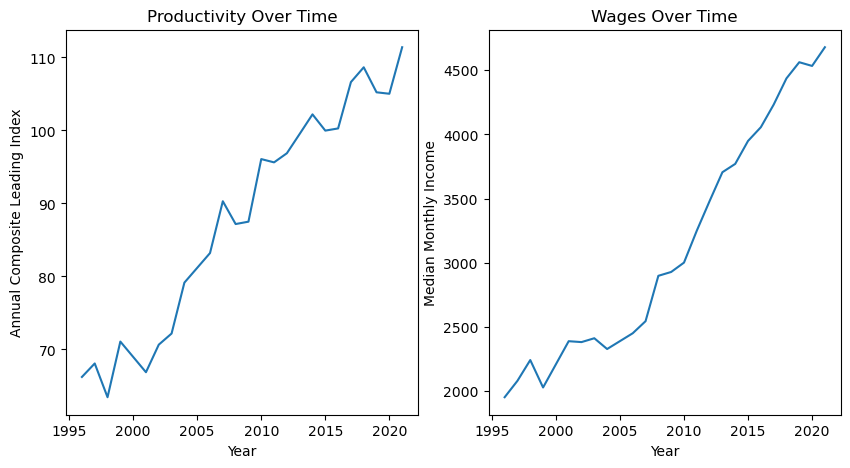

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first scatterplot in the first subplot
sns.lineplot(y=productivity, x=year, ax=axs[0])
axs[0].set_title('Productivity Over Time')

# Plot the second scatterplot in the second subplot
sns.lineplot(y=wages, x=year, ax=axs[1])
axs[1].set_title('Wages Over Time')
plt.show()

### Here we want to see whether there is a strong correlation between total graduates and productivity

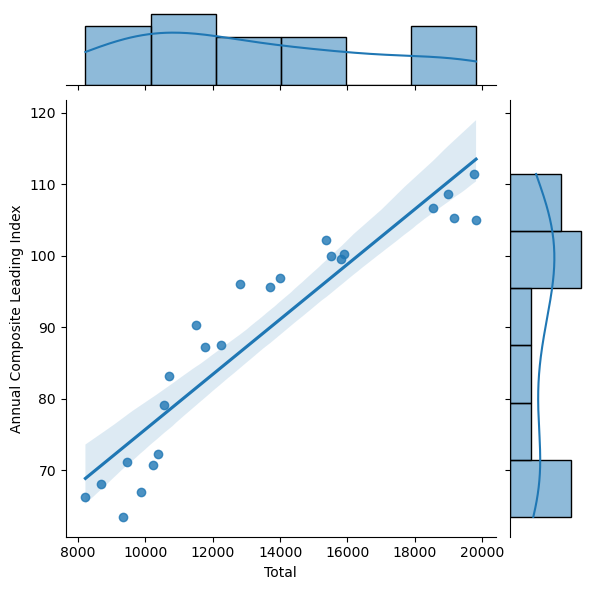

In [40]:
# Predictor: Productivity, Predictand: wages
sns.jointplot(x= total, y= productivity, kind="reg")
plt.show()

<AxesSubplot:>

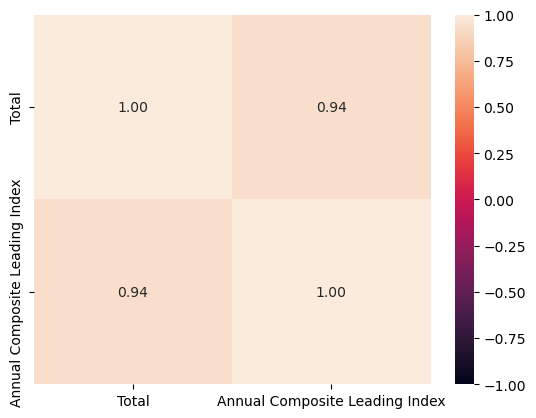

In [41]:
# Calculate the correlation between the two columns/variables
sns.heatmap(data[["Total", "Annual Composite Leading Index"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Not as strong of a correlation compared to total number of graduates and median income, but still a strong correlation.

### Now we do the same for male and female graduates

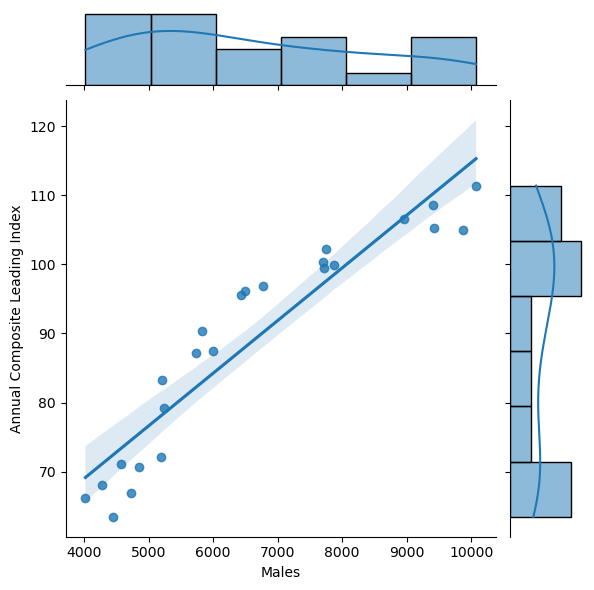

In [42]:
# Predictor: Productivity, Predictand: wages
sns.jointplot(x= males, y= productivity, kind="reg")
plt.show()

<AxesSubplot:>

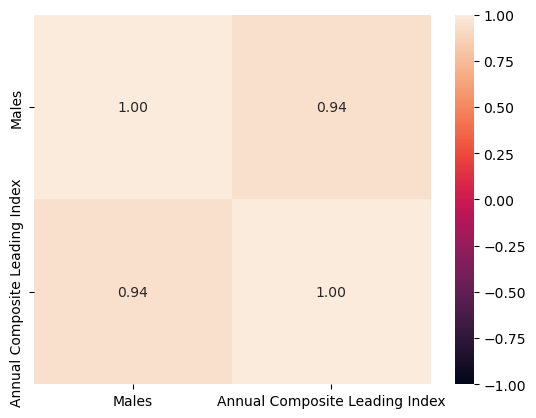

In [43]:
# Calculate the correlation between the two columns/variables
sns.heatmap(data[["Males", "Annual Composite Leading Index"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

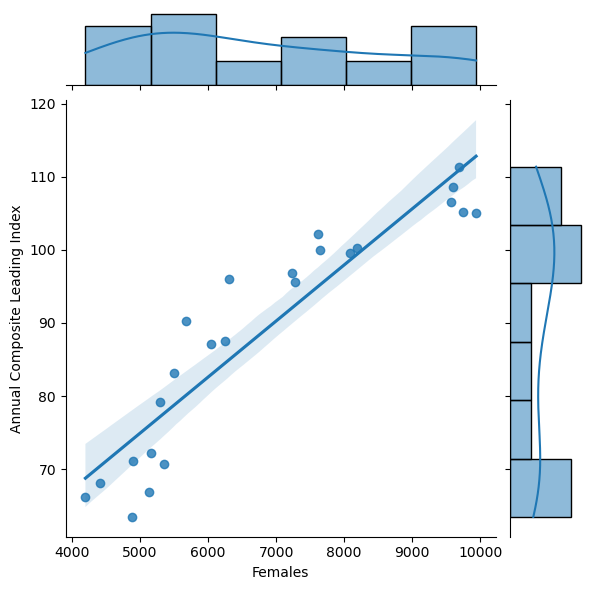

In [44]:
# Predictor: Productivity, Predictand: wages
sns.jointplot(x= females, y= productivity, kind="reg")
plt.show()

<AxesSubplot:>

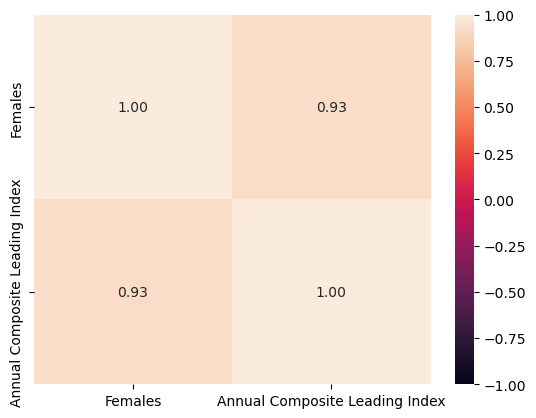

In [45]:
# Calculate the correlation between the two columns/variables
sns.heatmap(data[["Females", "Annual Composite Leading Index"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Here we see that both number of male and female graduates have a strong correlation with productivity

### Now, we see if when productivity is included, will the impact of total number of graduates on median income be affected. If a mediation effect exists, the correlation between graduates and median income will decrease 

In [46]:
# Extract Response and Predictors
y = data["Median Monthly Income"]
X = data[["Total", "Annual Composite Leading Index"]]
X = (X - X.mean()) / X.std()

### We will be using k-Fold Cross-Validation to evaluate the models due to small sample size

In [47]:
model = LinearRegression().fit(X, y)
print("Predictor: Productivity \t Predictand: Wages")
print("\nCoefficient:", model.coef_, '\t', 'Intercept:', model.intercept_)

Predictor: Productivity 	 Predictand: Wages

Coefficient: [848.02363477  65.49668609] 	 Intercept: 3177.8333333333335



R^2 score: 0.96
MSE: 24004.820673846232
Root Mean Squared Error: 154.93
Coeff: [857.12946173  43.21563203]

R^2 score: 0.98
MSE: 15028.306887837063
Root Mean Squared Error: 122.59
Coeff: [776.54826782 135.00411353]

R^2 score: 0.95
MSE: 16934.42673215175
Root Mean Squared Error: 130.13
Coeff: [786.61875688 136.34061917]

R^2 score: 0.96
MSE: 29710.76400658168
Root Mean Squared Error: 172.37
Coeff: [918.51749708   6.61189138]

R^2 score: 0.96
MSE: 17844.695567051043
Root Mean Squared Error: 133.58
Coeff: [898.35461079  23.9087432 ]

Goodness of Fit of Productivity against Graduate Profile:
Average Explained Variance (R^2) 	: 0.96
Average Root Mean Squared Error (RMSE) 	: 142.72
Average Coefficient (Total) 	: 847.43
Average Coefficient (Annual Composite Leading Index) 	: 69.02


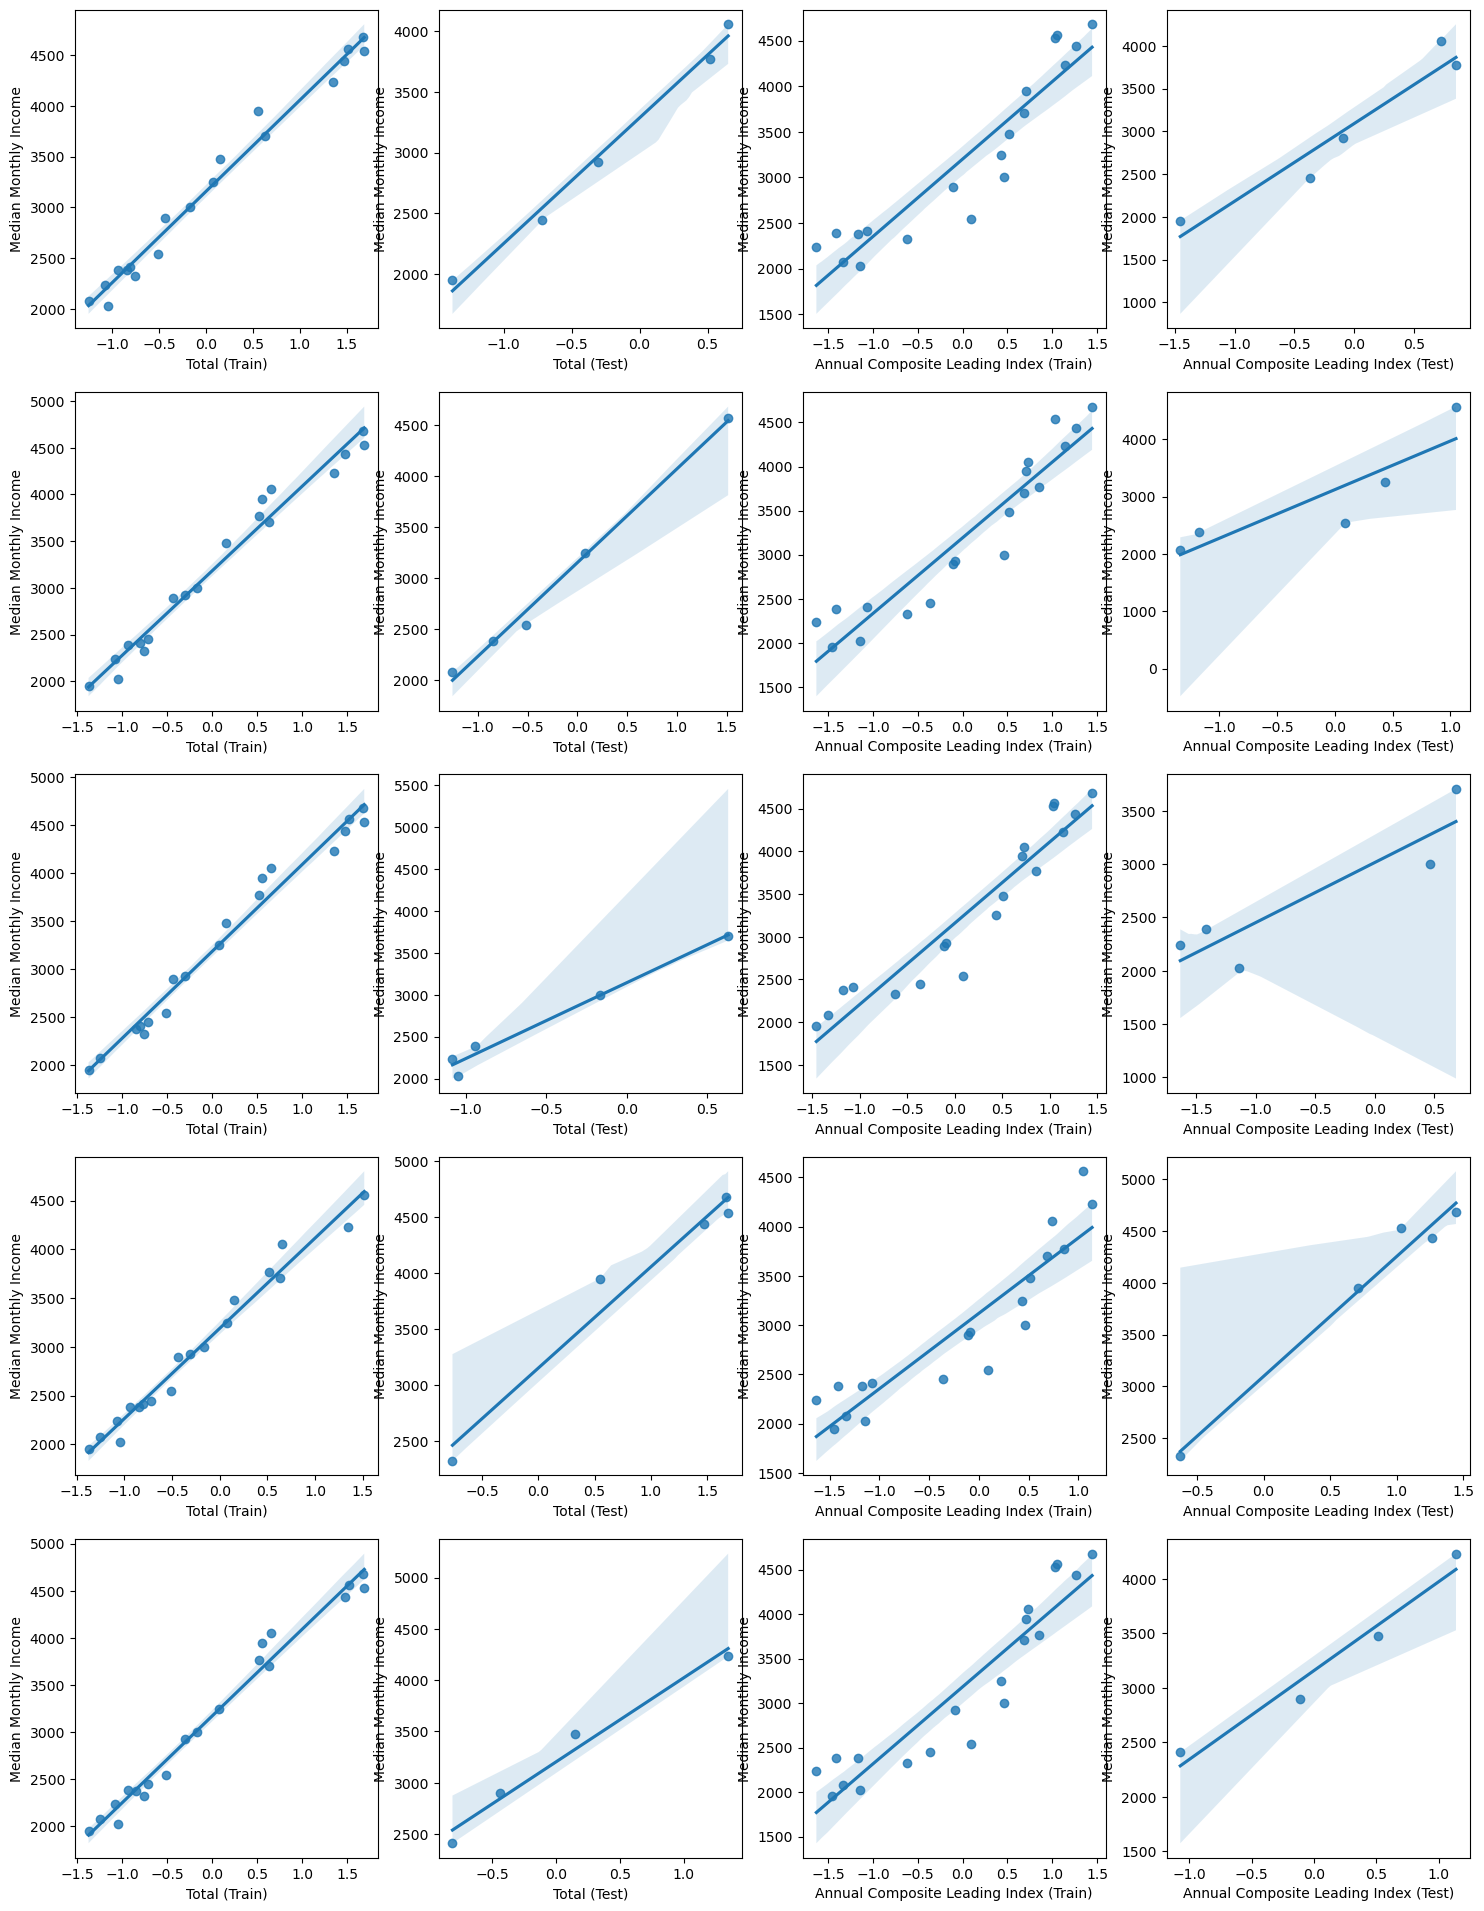

In [48]:
# Create empty lists to store RMSE and R2 scores for each fold
rmse_list = []
r2_list = []
coeff1 = []
coeff2 = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

f, axes = plt.subplots(5, 4, figsize=(18, 24))

count = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Perform regression analysis on the training set
    reg = LinearRegression()
    reg = reg.fit(X_train, y_train)

    # Predict productivity for the testing data
    y_pred = reg.predict(X_test)

    # Evaluate the model on the testing set
    r2 = reg.score(X_test, y_test)

    print(f"\nR^2 score: {r2:.2f}")

    # Calculate the mean squared error for this fold
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Calculate the coef for this fold
    cf = reg.coef_
    
    # Print the RSME and MSE for this fold
    print(f"MSE: {mse}")
    print("Root Mean Squared Error:", rmse.round(2))
    print("Coeff:", cf)

    # Append RMSE and R2 scores to the lists
    rmse_list.append(rmse)
    r2_list.append(r2)
    coeff1.append(cf[0])
    coeff2.append(cf[1])
    
    
    sns.regplot(x=X_train['Total'], y=y_train, label='Train', ax = axes[count,0])
    sns.regplot(x=X_test['Total'], y=y_test, label='Test', ax = axes[count,1])
    sns.regplot(x=X_train['Annual Composite Leading Index'], y=y_train, label='Train', ax = axes[count,2])
    sns.regplot(x=X_test['Annual Composite Leading Index'], y=y_test, label='Test', ax = axes[count,3])
    
    axes[count,0].set_xlabel('Total (Train)')
    axes[count,1].set_xlabel('Total (Test)')
    axes[count,2].set_xlabel('Annual Composite Leading Index (Train)')
    axes[count,3].set_xlabel('Annual Composite Leading Index (Test)')
    count += 1

# Calculate the average RMSE and R2 score
rmse_ave = np.mean(rmse_list)
score_ave = np.mean(r2_list)
coeff1_ave = np.mean(coeff1)
coeff2_ave = np.mean(coeff2)


print("\nGoodness of Fit of Productivity against Graduate Profile:")
print("Average Explained Variance (R^2) \t:", score_ave.round(2))
print("Average Root Mean Squared Error (RMSE) \t:", rmse_ave.round(2))
print("Average Coefficient (Total) \t:", coeff1_ave.round(2))
print("Average Coefficient (Annual Composite Leading Index) \t:", coeff2_ave.round(2))

<AxesSubplot:>

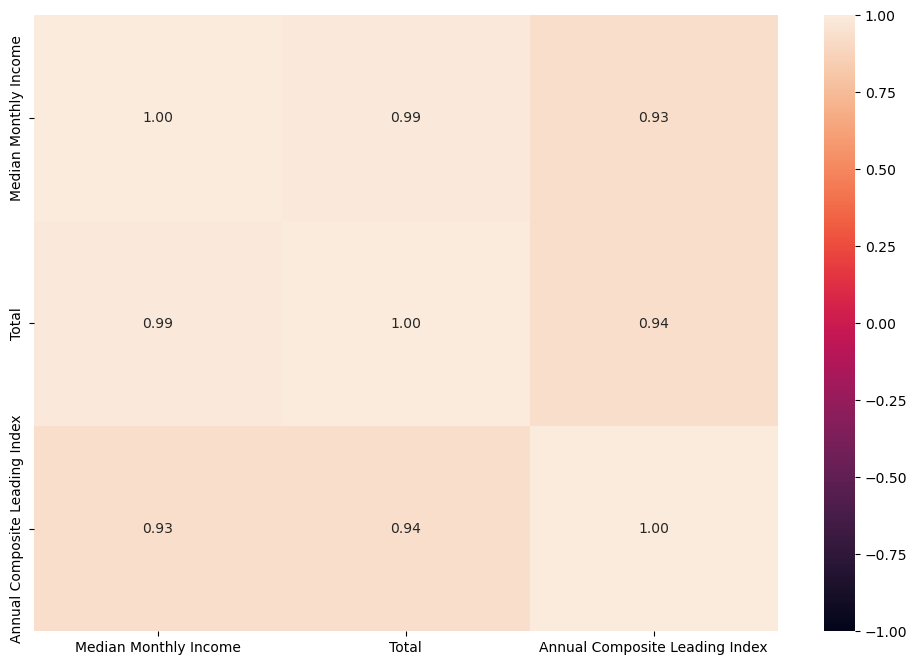

In [49]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sns.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

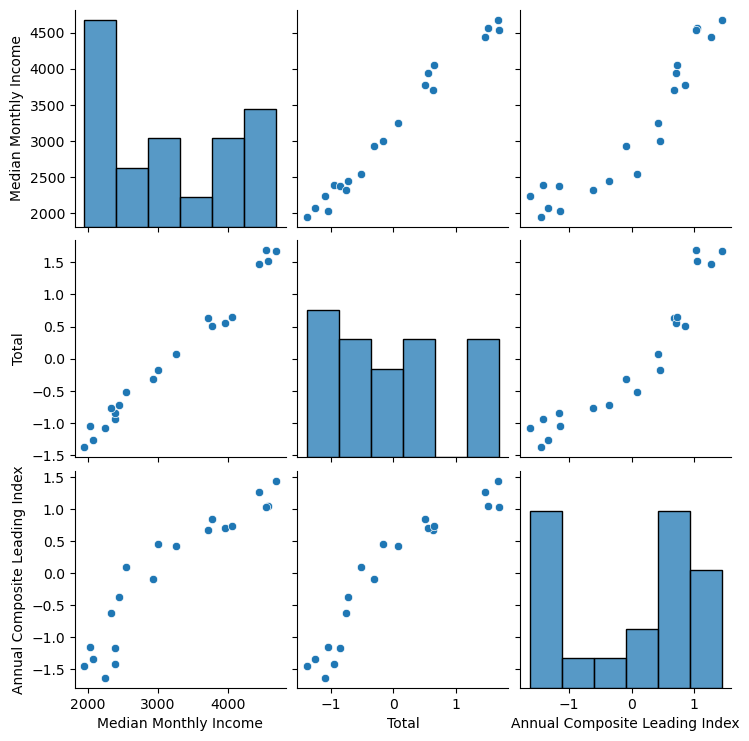

In [50]:
# Relationship between Response and the Predictors
sns.pairplot(data = trainDF)